In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import folium
from folium import plugins
plt.rcParams["figure.figsize"] = (6,4)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)     
# Kullanmayı düşündüğümüz library leri çalıştırdık.
# We ran the libraries we were planning to use.

In [2]:
original_df = pd.read_csv("netflix_titles_2021.csv") # datayı çağırdık. we called data.

In [3]:
df = original_df.copy() #Burada datanın kopyasını aldık. #Here we have a copy of the database.

In [4]:
df.head() # ilk 5 satırı gördük. we saw the first 5 lines.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
# dataframe shape
df.shape

(8807, 12)

In [6]:
df.nunique() 
# Her sütunda benzersiz kaç değer olduğunu gördük.
# We saw how many unique values are in each column.

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [7]:
#show_id: İçeriğe özel kimlik numarası.
#type: İçeriğin türü, örneğin Film veya Dizi.
#title: Filmin veya dizinin adı.
#director: Filmi veya diziyi yöneten kişi.
#cast: Filmde veya dizide oynayan oyuncuların listesi.
#country: İçeriğin üretildiği veya çekildiği ülke.
#date_added: İçeriğin platforma eklendiği tarih.
#release_year: Filmin veya dizinin yayınlandığı yıl.
#rating: İçerik için belirlenen yaş sınırlaması (örneğin, PG-13).
#duration: Filmin süresi veya dizinin sezon sayısı.
#listed_in: İçeriğin yer aldığı kategoriler, örneğin Drama, Komedi.
#description: Filmin veya dizinin kısa özeti veya açıklaması.


#show_id: Content specific ID number.
#type: The type of content, for example Movie or Series.
#title: The name of the movie or series.
#director: The person who directed the movie or series.
#cast: The list of actors in the movie or TV series.
#country: The country where the content was produced or filmed.
#date_added: The date the content was added to the platform.
#release_year: The year the movie or series was released.
#rating: The age rating assigned to the content (for example, PG-13).
#duration: The duration of the movie or number of seasons of the series.
#listed_in: The categories in which the content appears, e.g. Drama, Comedy.
#description: Short summary or description of the movie or series.



## Data Temizleme

In [8]:
df.duplicated().value_counts() 
# Data içerisndeki aynı satırlaın kontrolü yapıldı. Benzer satır bulunamadı.
# The same rows in the data were checked. No similar row found.


False    8807
Name: count, dtype: int64

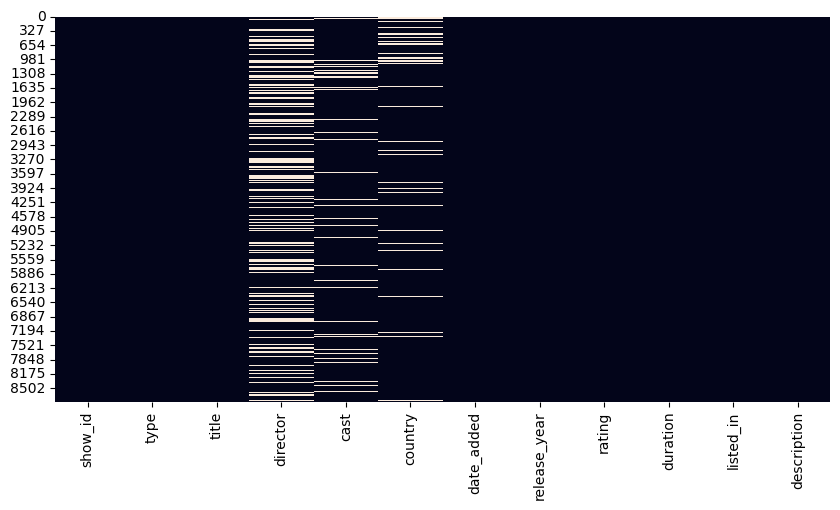

In [9]:
plt.figure(figsize=(10,5)) 
# Eksik değerleri heatmap grafiği kullanarak görmüş olduk.
# We have seen the missing values using the heatmap chart.
sns.heatmap(df.isnull(), cbar=False); 
# Çizgiler eksik verilerin olduğunu gösterdi.
# The lines showed that there was missing data.

In [10]:
df.isna().sum() 
# Null değerlerin sayısını görmüş olduk.
# We have seen the number of null values.

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [11]:
df.nunique()
#Sütunlarda benzersiz değerlerin sayılarını gördük.
#In the columns we saw the numbers of unique values.

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [12]:
# director, cast ve country sütunlarındaki eksik değerler 'Unknown' (Bilinmeyen) olarak doldurulabilir.
# date_added sütununda eksik değeri olan 10 kayıt, veri setinden silinebilir.
# rating sütunundaki eksik değerler, bu sütunun modu (en sık görülen değeri) ile doldurulabilir, 
# çünkü bu sütun kesikli (discrete) bir değişkendir.


# missing values in the director, cast and country columns can be filled as 'Unknown'.
# 10 records with missing values in the date_added column can be deleted from the dataset.
# missing values in the rating column can be filled with the mode (most frequent value) of this column, 
# because this column is a discrete variable.

In [13]:
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown') 
#director, cast ve country sütunlarındaki eksik değerler 'Unknown' (Bilinmeyen) olarak doldurduk.
#We filled in the missing values 'Unknown' in the director, cast and country columns.

In [14]:
df.isna().sum() 
# Burada null değerleri kontrol ettik.
# Here we checked for null values.

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [15]:
df['rating'].value_counts() 
# rating toplam sayılarına baktık.
#We looked at the total number of ratings.

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

In [16]:
df['rating'] = df['rating'].fillna(df['rating'].mode()[0]) 
#rating sütunundaki eksik değerler - missing values in the rating column 
#bu sütunun modu (en sık görülen değeri) ile doldurduk - we filled with the mode (most frequent value) of this column. 

In [17]:
df.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         3
listed_in        0
description      0
dtype: int64

In [18]:
df[df.isnull().any(axis=1)].info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 5541 to 8182
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       13 non-null     object
 1   type          13 non-null     object
 2   title         13 non-null     object
 3   director      13 non-null     object
 4   cast          13 non-null     object
 5   country       13 non-null     object
 6   date_added    3 non-null      object
 7   release_year  13 non-null     int64 
 8   rating        13 non-null     object
 9   duration      10 non-null     object
 10  listed_in     13 non-null     object
 11  description   13 non-null     object
dtypes: int64(1), object(11)
memory usage: 1.3+ KB


In [19]:
df.dropna(axis=0, inplace = True) 
# Kalan eksik veriler (date_added ve duration  ) drop ettik yani sildik.
# We dropped the remaining missing data (date_added and duration ), i.e. deleted it.

In [20]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [21]:
df.shape

(8794, 12)

In [22]:
df.country.value_counts() 
# Country sütununun value lerini saydırdık.
#We counted the values of the Country column.

country
United States                                                                                                                  2809
India                                                                                                                           972
Unknown                                                                                                                         830
United Kingdom                                                                                                                  418
Japan                                                                                                                           244
South Korea                                                                                                                     199
Canada                                                                                                                          181
Spain                                                               

In [23]:
df.listed_in.value_counts()

listed_in
Dramas, International Movies                                                       362
Documentaries                                                                      359
Stand-Up Comedy                                                                    334
Comedies, Dramas, International Movies                                             274
Dramas, Independent Movies, International Movies                                   252
Kids' TV                                                                           219
Children & Family Movies                                                           215
Children & Family Movies, Comedies                                                 201
Documentaries, International Movies                                                186
Dramas, International Movies, Romantic Movies                                      180
Comedies, International Movies                                                     176
Comedies, International Movies, R

In [24]:
# Bu açıklamada, çoklu ülke ve tür bilgisine sahip filmler/diziler 
# ile ilgili analizlerin basitleştirilmesi amaçlanıyor. İşte ne yapmanız gerektiği:

#  Birincil Ülke: Eğer bir film veya dizi birden fazla ülkede çekilmişse, 
# sadece birincil (ana) ülkeyi dikkate almanız öneriliyor. Yani, hangi ülkenin film/dizi için ana ülke olarak 
# kabul edildiği belirlenmeli ve sadece o ülke kullanılmalıdır.

#  Birincil Tür: Benzer şekilde, bir film veya dizi birden fazla tür ile ilişkilendirilmişse, 
# sadece birincil (ana) türü kullanarak analizi basitleştirmelisiniz. 
# Yani, hangi türün film/dizi için ana tür olduğu belirlenmeli ve sadece o tür kullanılmalıdır.
#-------------------------------------------------------------------------------------
# In this explanation, movies/series with multiple country and genre information 
# is intended to simplify the related analysis. Here's what you need to do:

# Primary Country: If a movie or TV series was filmed in more than one country, 
# it is recommended that you only consider the primary (home) country. That is, which country is the home country for the movie/series 
# accepted and only that country should be used.

# Primary Genre: Similarly, if a movie or series is associated with more than one genre, 
# you should simplify the analysis by using only the primary (main) genre. 
# That is, identify which genre is the primary genre for the movie/series and use only that genre.

In [25]:
df['country'] = df['country'].apply(lambda x: x.split(',')[0]) 
# Country sütunundaki çoklu ülke isimlerini 1. ülke isimleri ile doldurduk.
#Multiple country names in the Country column 1.with a little bit of a lotion.

In [26]:
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])
# listed_in sütunundaki çoklu film türü isimlerini 1. film isimleri ile doldurduk.
#multiple movie type names in the listed_in column 1. filled with movie names.

In [27]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,Docuseries,"Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,In a city of coaching centers known to train I...


In [28]:
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0])) 
# duration sütununundaki string ifadeleri kaldırdık. bu sütunun datatype ni integere çevirdik.
#We removed the string expressions in the duration column. we changed the datatype of this column to integer.

In [29]:
# Number of seasons for tv shows
df[df['type']=='TV Show'].duration.value_counts() 
# Türü TV show olanların sezon sayılarını grup olarak saydırdık.
#We counted the number of seasons of TV shows as a group.

duration
1     1793
2      421
3      198
4       94
5       64
6       33
7       23
8       17
9        9
10       6
13       2
15       2
12       2
17       1
11       1
Name: count, dtype: int64

In [30]:
df[df['type']=='Movie'].duration.unique() 
# type Movie olan satırların duration sütunundaki benzersiz değerleri gördük.
#We have seen the unique values in the duration column of rows with type Movie.

array([ 90,  91, 125, 104, 127,  67,  94, 161,  61, 166, 147, 103,  97,
       106, 111, 110, 105,  96, 124, 116,  98,  23, 115, 122,  99,  88,
       100, 102,  93,  95,  85,  83, 113,  13, 182,  48, 145,  87,  92,
        80, 117, 128, 119, 143, 114, 118, 108,  63, 121, 142, 154, 120,
        82, 109, 101,  86, 229,  76,  89, 156, 112, 107, 129, 135, 136,
       165, 150, 133,  70,  84, 140,  78,  64,  59, 139,  69, 148, 189,
       141, 130, 138,  81, 132, 123,  65,  68,  66,  62,  74, 131,  39,
        46,  38, 126, 155, 159, 137,  12, 273,  36,  34,  77,  60,  49,
        58,  72, 204, 212,  25,  73,  29,  47,  32,  35,  71, 149,  33,
        15,  54, 224, 162,  37,  75,  79,  55, 158, 164, 173, 181, 185,
        21,  24,  51, 151,  42,  22, 134, 177,  52,  14,  53,   8,  57,
        28,  50,   9,  26,  45, 171,  27,  44, 146,  20, 157,  17, 203,
        41,  30, 194, 233, 237, 230, 195, 253, 152, 190, 160, 208, 180,
       144,   5, 174, 170, 192, 209, 187, 172,  16, 186,  11, 19

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8794 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8794 non-null   object
 1   type          8794 non-null   object
 2   title         8794 non-null   object
 3   director      8794 non-null   object
 4   cast          8794 non-null   object
 5   country       8794 non-null   object
 6   date_added    8794 non-null   object
 7   release_year  8794 non-null   int64 
 8   rating        8794 non-null   object
 9   duration      8794 non-null   int64 
 10  listed_in     8794 non-null   object
 11  description   8794 non-null   object
dtypes: int64(2), object(10)
memory usage: 893.1+ KB


In [32]:
df['date_added']=df['date_added'].str.lstrip() 
# date_added sütunu içerisindeki sol taraftaki gereksiz boşluk karakterler silindi
#Removed unnecessary space characters on the left side in the date_added column

In [33]:
df["date_added"] = pd.to_datetime(df['date_added'])
# date_added sütunu datetime formatına çevrildi.
# date_added column converted to datetime format.

In [34]:
df['date_added'].min(),df['date_added'].max() 
#Netflix sistemine 2008-01-01 & 2021-09-25 tarihleri arasında yükleme yapılmıştır. 
#The Netflix system was uploaded between 2008-01-01 & 2021-09-25. 

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-09-25 00:00:00'))

In [35]:
df['month_added'] = df['date_added'].dt.month 
#Tarihlerin ay kısmı  için ayrı sütun oluşturduk.
#We created a separate column for the month part of the dates.

In [36]:
df['year_added'] = df['date_added'].dt.year 
#Tarihlerin yıl kısmı  için ayrı sütun oluşturduk.
#We created a separate column for the year part of the dates.

In [37]:
df.drop('date_added', axis=1, inplace=True) 
#Değişimi kalıcı hale getirdik
#We made the change permanent

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8794 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8794 non-null   object
 1   type          8794 non-null   object
 2   title         8794 non-null   object
 3   director      8794 non-null   object
 4   cast          8794 non-null   object
 5   country       8794 non-null   object
 6   release_year  8794 non-null   int64 
 7   rating        8794 non-null   object
 8   duration      8794 non-null   int64 
 9   listed_in     8794 non-null   object
 10  description   8794 non-null   object
 11  month_added   8794 non-null   int32 
 12  year_added    8794 non-null   int32 
dtypes: int32(2), int64(2), object(9)
memory usage: 893.1+ KB


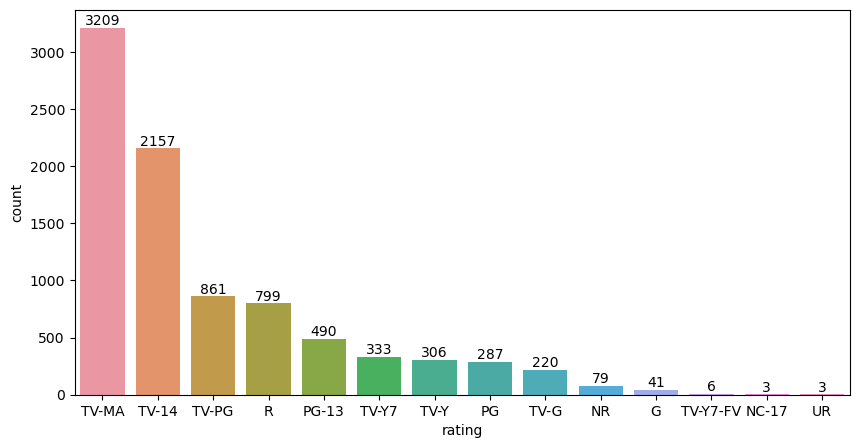

In [39]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='rating',data=df,order = df['rating'].value_counts().index);
for p in ax.containers:
    ax.bar_label(p) 
# rating sütunundaki izleyici kitlesine göre  count grafiği ile görselleştirdik.
# We visualized it with the count chart according to the audience in the rating column.


In [40]:
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [41]:
#rating sütunundaki değerlerin değiştirilmesi
# Changing the values in the rating column
rating_map = {'TV-MA':'Yetişkin',
              'R':'Yetişkin',
              'PG-13':'Genç',
              'TV-14':'Genç Yetişkin',
              'TV-PG':'Büyük Çocuklar',
              'NR':'Yetişkin',
              'TV-G':'Çocuk',
              'TV-Y':'Çocuk',
              'TV-Y7':'Büyük Çocuklar',
              'PG':'Büyük Çocuklar',
              'G':'Çocuk',
              'NC-17':'Yetişkin',
              'TV-Y7-FV':'Büyük Çocuklar',
              'UR':'Yetişkin'}

In [42]:
df['rating'].replace(rating_map, inplace = True)
df['rating'].unique() 
# Rating sütunundaki değerlerin anlaşılır olması için değerlerin isimlerini değiştirdik.
#To make the values in the Rating column understandable, we changed the names of the values.

array(['Genç', 'Yetişkin', 'Büyük Çocuklar', 'Genç Yetişkin', 'Çocuk'],
      dtype=object)

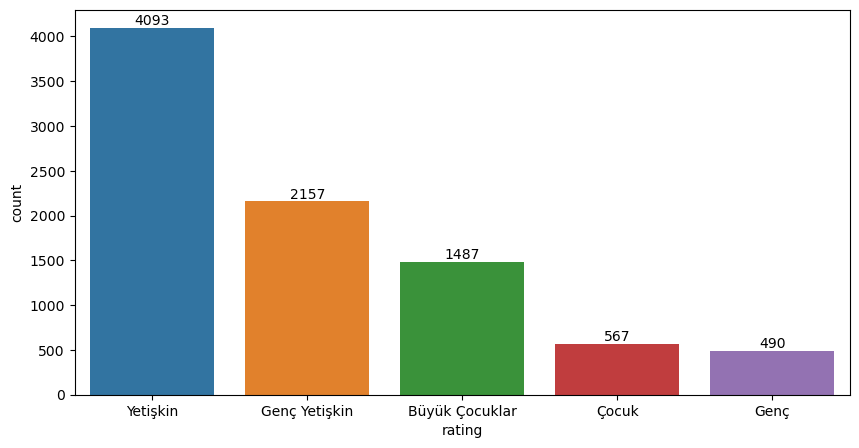

In [43]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='rating',data=df,order = df['rating'].value_counts().index)
for p in ax.containers:
    ax.bar_label(p)
# Bu grafikle Netflix içersisindeki içeriklerin % 50 den fazla yetişkinler, 
# sonra genç yetişkinler,büyük çocuklar ve çocuklar için son olarakta gençler
# için içerik üretim oranlarını gözlemledik.

# This graph shows that more than 50% of the content on Netflix is for adults, 
# then for young adults, older children and children and finally for teenagers
# We observed the rates of content production.



Text(0.5, 1.0, 'Movies and TV Shows in the dataset')

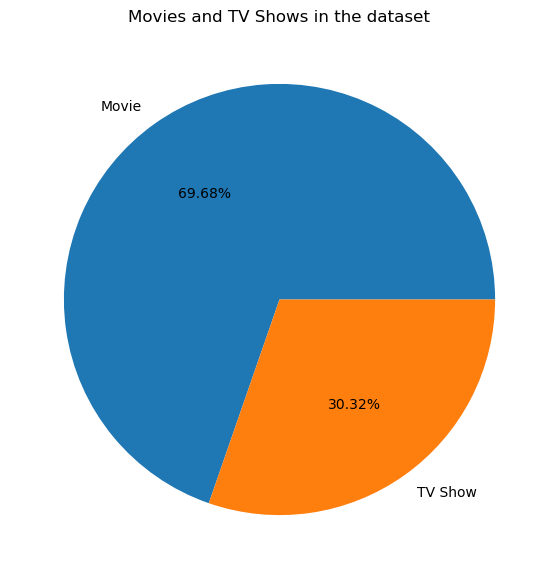

In [44]:
plt.figure(figsize=(7,7))
df.type.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset') 
# Netflix type türünde Movie oranının Tv Show oranını tespit ettik.
#We detected the ratio of Movie to Tv Show ratio in Netflix type type.

In [45]:
df[(df['director'] != 'Unknown')].director.value_counts().head(10)
# director sutunundaki değerleri 'Unknown' değeri hariç tutularak saydırıp ilk 10 değeri getirdik.
#We counted the values in the director column excluding the 'Unknown' value and retrieved the first 10 values.

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Martin Scorsese           12
Youssef Chahine           12
Steven Spielberg          11
Name: count, dtype: int64

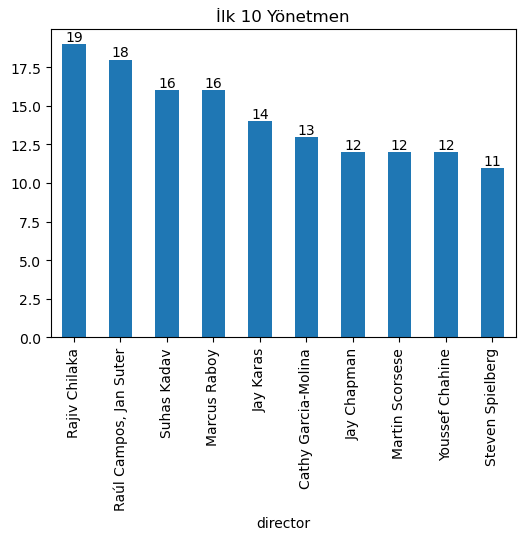

In [46]:
ax =  df[(df['director'] != 'Unknown')].director.value_counts().head(10).plot(kind = "bar",  )
plt.title('İlk 10 Yönetmen')
for p in ax.containers:
    ax.bar_label(p)
# En çok yönetmenlik yapan ilk 10 yönetmeni gösterdik.
# We showed the top 10 directors who directed the most.

In [47]:
df[(df['country'] != 'Unknown')].country.value_counts().head(10)
# country sutunundaki değerleri 'Unknown' değeri hariç tutularak saydırıp ilk 10 değeri getirdik.
# We counted the values in the country column excluding the 'Unknown' value and got the first 10 values.

country
United States     3202
India             1008
United Kingdom     627
Canada             271
Japan              258
France             212
South Korea        211
Spain              181
Mexico             134
Australia          116
Name: count, dtype: int64

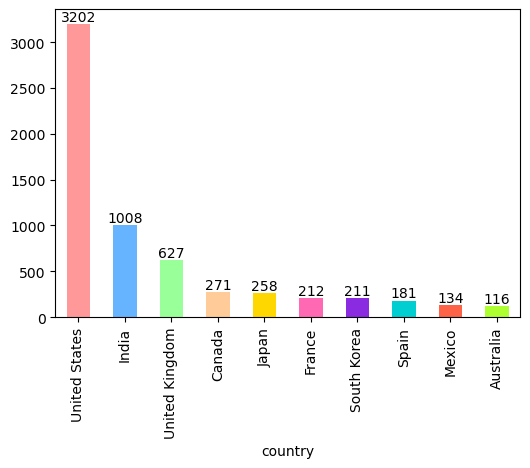

In [48]:
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700', 
          '#FF69B4', '#8A2BE2', '#00CED1', '#FF6347', '#ADFF2F']
ax = df[(df['country'] != 'Unknown')].country.value_counts().head(10).plot(kind = 'bar', color = colors )
for p in ax.containers:
    ax.bar_label(p)
# Ülke bazlı değerlerin ilk 10 değeri tabloda gösterdik. 
# We have shown the top 10 country-based values in the table. 

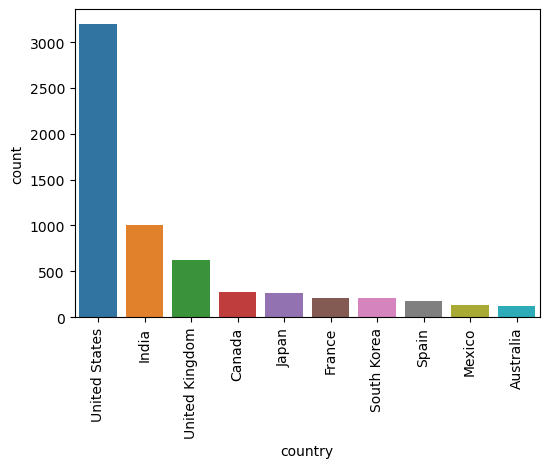

In [49]:
sns.countplot(data = df, x = 'country', order = df[(df['country'] != 'Unknown')].country.value_counts().head(10).index)
plt.xticks(rotation = 90);
#Yukarıdaki değerleri count plot ile gösterdik.
#We have shown the above values with count plot.

In [50]:
df.head(5)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,Genç,90,Documentaries,"As her father nears the end of his life, filmm...",9,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,Yetişkin,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",9,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021,Yetişkin,1,Crime TV Shows,To protect his family from a powerful drug lor...,9,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021,Yetişkin,1,Docuseries,"Feuds, flirtations and toilet talk go down amo...",9,2021
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,Yetişkin,2,International TV Shows,In a city of coaching centers known to train I...,9,2021


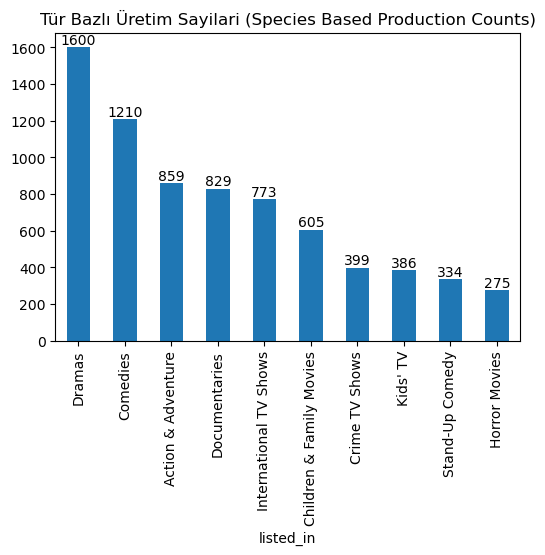

In [51]:
ax=df.listed_in.value_counts().head(10).plot(kind='bar');
for p in ax.containers:
    ax.bar_label(p)
plt.title('Tür Bazlı Üretim Sayilari (Species Based Production Counts)');

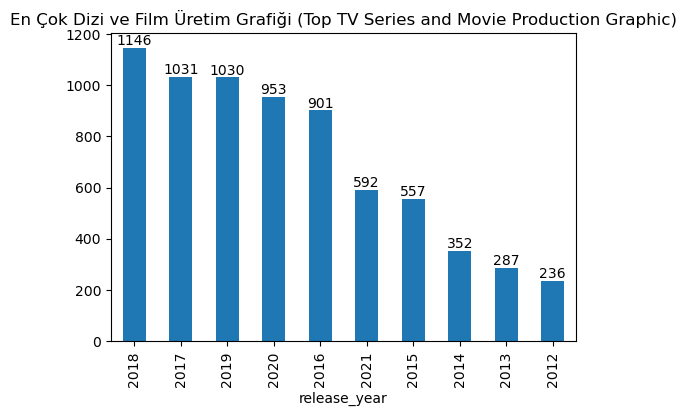

In [52]:
ax=df.release_year.value_counts().head(10).plot(kind='bar')
for p in ax.containers:
    ax.bar_label(p)
plt.title('En Çok Dizi ve Film Üretim Grafiği (Top TV Series and Movie Production Graphic)');

Dramalar en popüler türdür ve onları komediler ve belgeseller takip etmektedir.
Bu üç tür tüm film ve TV şovlarının yaklaşık %41'ini oluşturmaktadır.
Bu değer ilk 10 tür için yaklaşık %82'ye yükselmektedir.

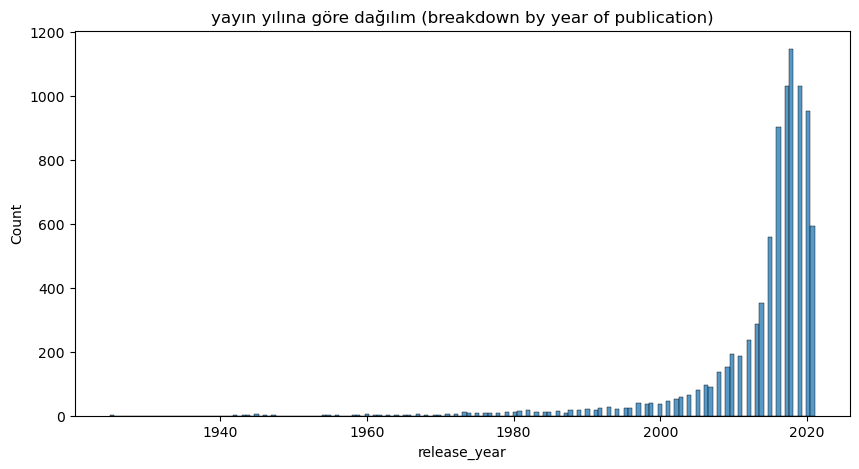

In [53]:
plt.figure(figsize=(10,5))
sns.histplot(df['release_year'])
plt.title('yayın yılına göre dağılım (breakdown by year of publication)'); 

In [54]:
df.listed_in.value_counts().nlargest(3).sum()/len(df)*100

41.7216283829884

In [55]:
df.month_added.value_counts().index

Index([7, 12, 9, 4, 10, 8, 3, 1, 6, 11, 5, 2], dtype='int32', name='month_added')

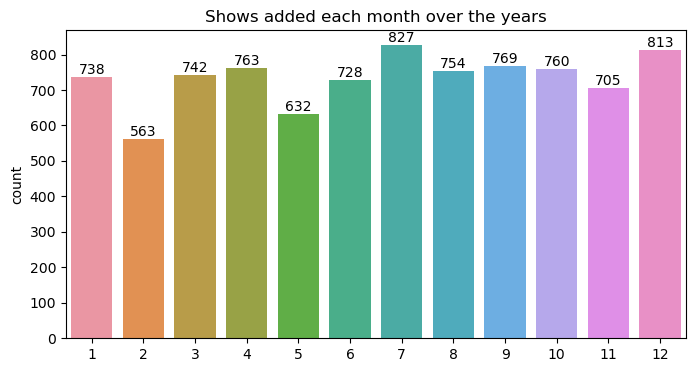

In [56]:
plt.figure(figsize = (8,4)) 
ax = sns.countplot(data = df, x = 'month_added' )
plt.title('Shows added each month over the years')
plt.xlabel('')
for p in ax.containers:
    ax.bar_label(p); 
    # Ay bazında ekleneneler birbirine yakın değerlerden oluşuyor.
    # Monthly additions are close to each other.

In [57]:
df.head(5)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,Genç,90,Documentaries,"As her father nears the end of his life, filmm...",9,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,Yetişkin,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",9,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021,Yetişkin,1,Crime TV Shows,To protect his family from a powerful drug lor...,9,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021,Yetişkin,1,Docuseries,"Feuds, flirtations and toilet talk go down amo...",9,2021
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,Yetişkin,2,International TV Shows,In a city of coaching centers known to train I...,9,2021


In [58]:
grouped_data = df.groupby(["year_added", "month_added"])["month_added"].count().unstack()

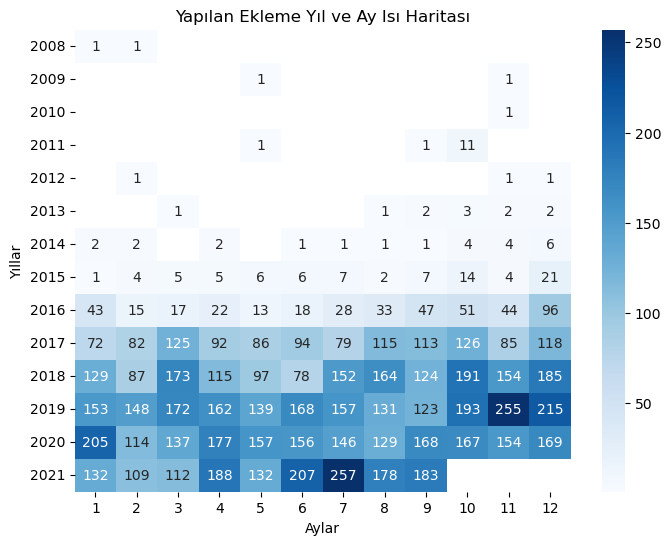

In [59]:
plt.figure(figsize=(8,6))  # Grafik boyutunu ayarlama
sns.heatmap(grouped_data, annot=True, cmap='Blues', fmt='g')  # Isı haritasını oluşturma
plt.title('Yapılan Ekleme Yıl ve Ay Isı Haritası')
plt.xlabel('Aylar')
plt.ylabel('Yıllar')
plt.show()  
# Yapılan Ekleme Yıl ve Ay Isı Haritası

#"	"cmap='Blues': Renk paleti olarak mavi tonları kullanılır. Dilerseniz başka bir renk paleti seçebilirsiniz.
#annot=True: Hücrelerdeki değerlerin gösterilmesini sağlar.
#fmt='g': Hücrelerdeki sayı formatını belirtir (tamsayı olarak gösterir)."





In [60]:
grouped_data = df.groupby(["year_added", "month_added"])["month_added"].count().unstack()

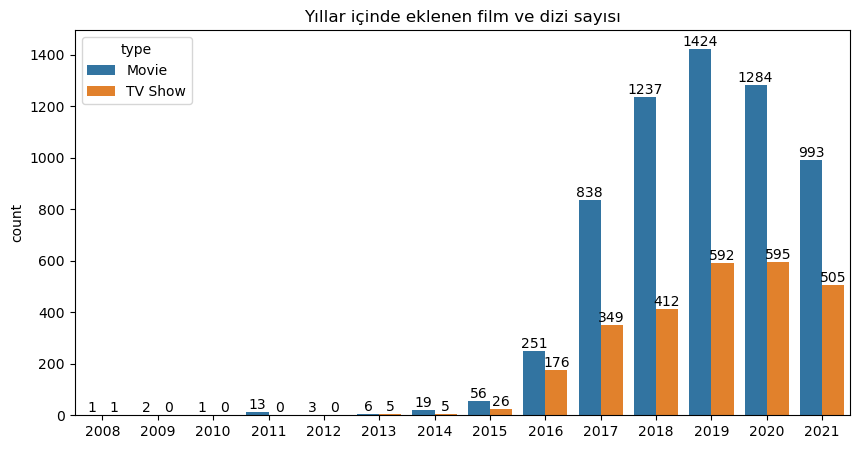

In [61]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='year_added',data=df, hue='type')
plt.title('Yıllar içinde eklenen film ve dizi sayısı')
plt.xlabel('')
for p in ax.containers:
    ax.bar_label(p);

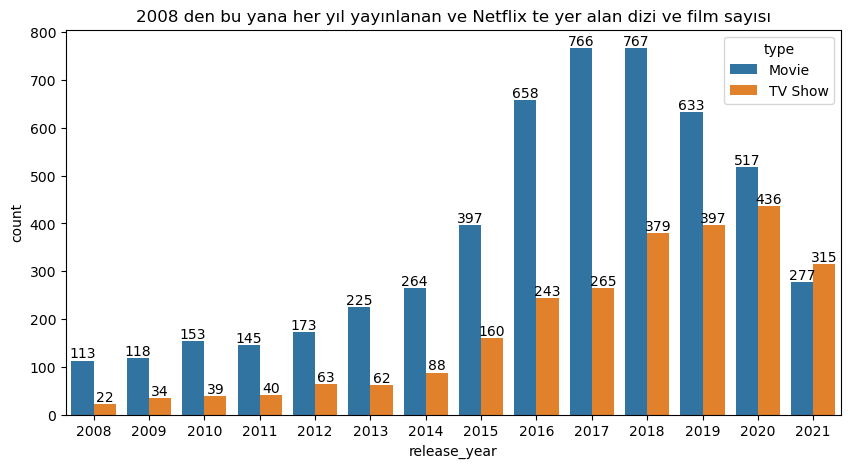

In [62]:
order = range(2008,2022)
plt.figure(figsize=(10,5))
ax = sns.countplot(x='release_year',data=df, hue='type',
                  order = order)
plt.title('2008 den bu yana her yıl yayınlanan ve Netflix te yer alan dizi ve film sayısı')
for p in ax.containers:
    ax.bar_label(p);

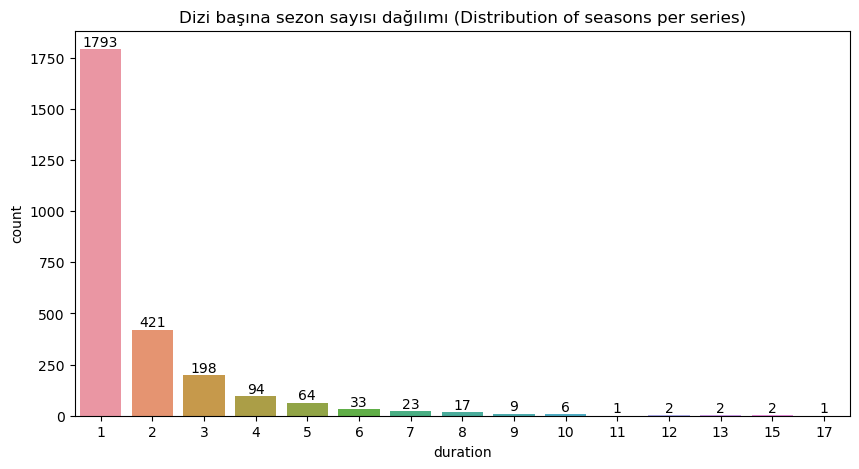

In [63]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x='duration',data=df[df['type']=='TV Show'])
plt.title('Dizi başına sezon sayısı dağılımı (Distribution of seasons per series)')
for p in ax.containers:
    ax.bar_label(p);

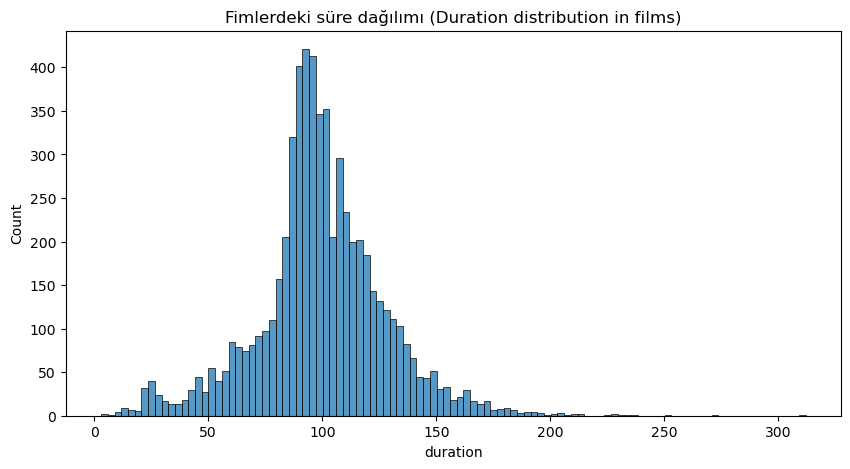

In [64]:
plt.figure(figsize=(10,5))
sns.histplot(x='duration',data=df[df['type']=='Movie'])
plt.title('Fimlerdeki süre dağılımı (Duration distribution in films)');

In [65]:
df[df['type']== 'Movie'].duration.describe()

count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

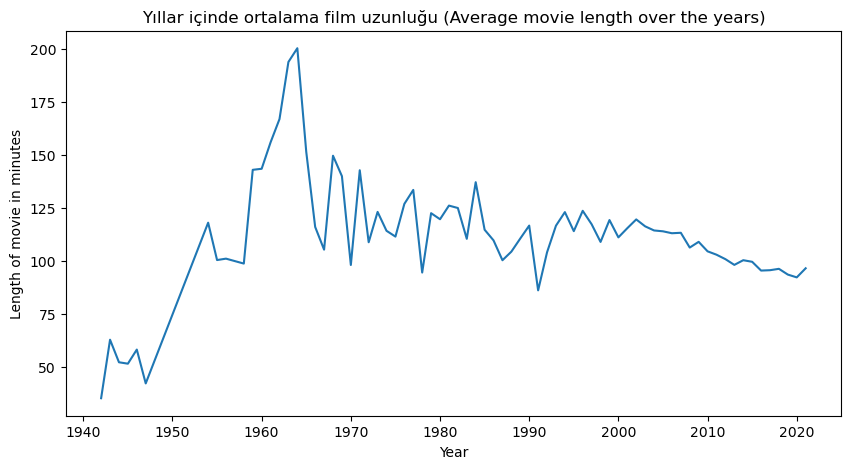

In [66]:
plt.figure(figsize=(10,5))
df[df['type']=='Movie'].groupby('release_year')['duration'].mean().plot(kind='line')
plt.title('Yıllar içinde ortalama film uzunluğu (Average movie length over the years)')
plt.ylabel('Length of movie in minutes')
plt.xlabel('Year');

Text(0.5, 1.0, 'Filmler için en iyi 10 tür (The 10 best genres for movies)')

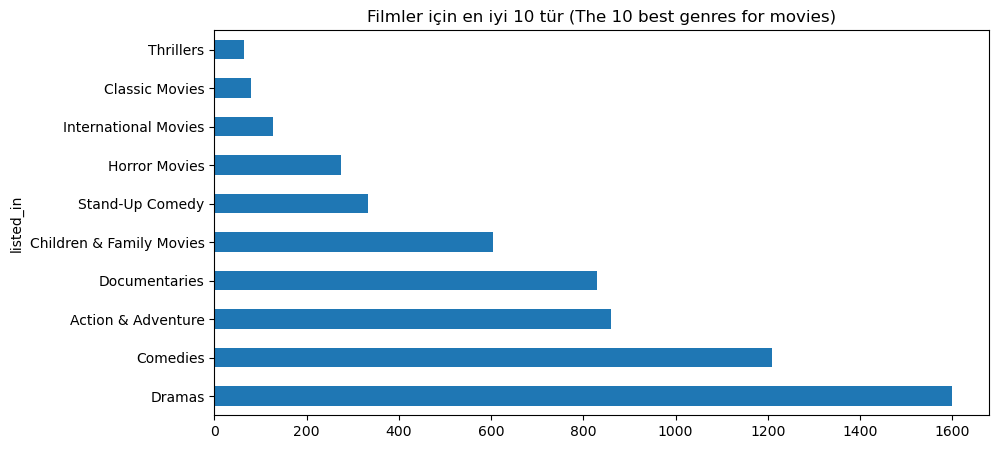

In [67]:
plt.figure(figsize=(10,5))
df[df['type']=='Movie'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Filmler için en iyi 10 tür (The 10 best genres for movies)')

Text(0.5, 1.0, 'Tv Showlar için en iyi 10 tür (Top 10 genre for tv shows)')

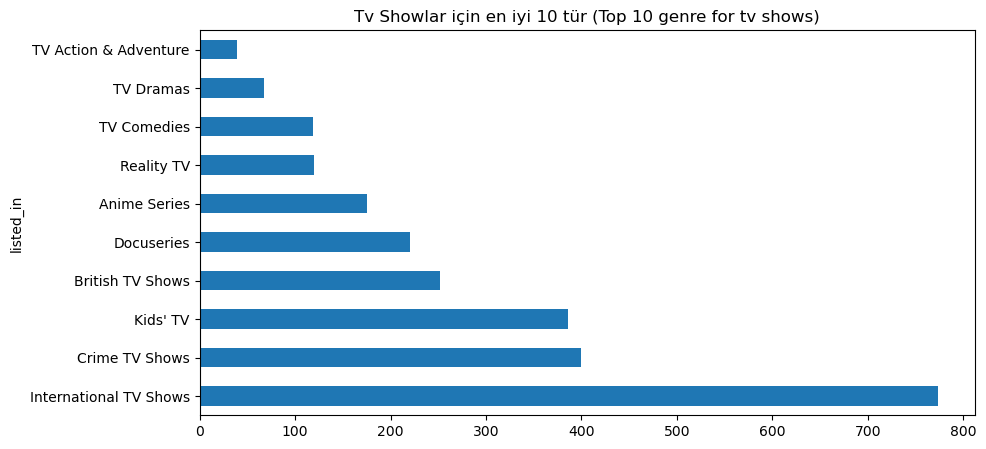

In [68]:
# Top 10 genre for tv shows
plt.figure(figsize=(10,5))
df[df['type']=='TV Show'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Tv Showlar için en iyi 10 tür (Top 10 genre for tv shows)')

In [69]:
df.head(5)

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2020,Genç,90,Documentaries,"As her father nears the end of his life, filmm...",9,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,Yetişkin,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",9,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021,Yetişkin,1,Crime TV Shows,To protect his family from a powerful drug lor...,9,2021
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021,Yetişkin,1,Docuseries,"Feuds, flirtations and toilet talk go down amo...",9,2021
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,Yetişkin,2,International TV Shows,In a city of coaching centers known to train I...,9,2021


In [70]:
df_cast_split = df[~(df['cast']=='Unknown') & (df['type']=='Movie')].assign(cast=df['cast'].str.split(', '))
df_cast_exploded = df_cast_split.explode('cast')
df_cast_exploded['cast'].value_counts().nlargest(10) 
# 'cast' sütununda 'Unknown' olanları çıkartıyoruz ve sadece 'Movie' türündeki filmleri seçiyoruz
# 'cast' sütunundaki her hücreyi virgül ve boşluklara göre ayırıp, bu hücreleri birer liste haline getiriyoruz
# 'cast' sütunundaki listeleri patlatarak (explode), her oyuncuyu ayrı bir satır haline getiriyoruz
# Patlatılmış 'cast' sütunundaki oyuncu isimlerini sayıyoruz ve en çok görünen 10 tanesini seçiyoruz


# In the 'cast' column, remove the 'Unknown' ones and select only movies of the 'Movie' genre
# Separate each cell in the 'cast' column by commas and spaces and make them into a list
# Explode the lists in the 'cast' column, making each player a separate row
# We count the actor names in the exploded 'cast' column and select the 10 most visible ones


cast
Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    32
Om Puri             30
Akshay Kumar        30
Amitabh Bachchan    28
Paresh Rawal        28
Julie Tejwani       28
Rupa Bhimani        27
Boman Irani         27
Name: count, dtype: int64

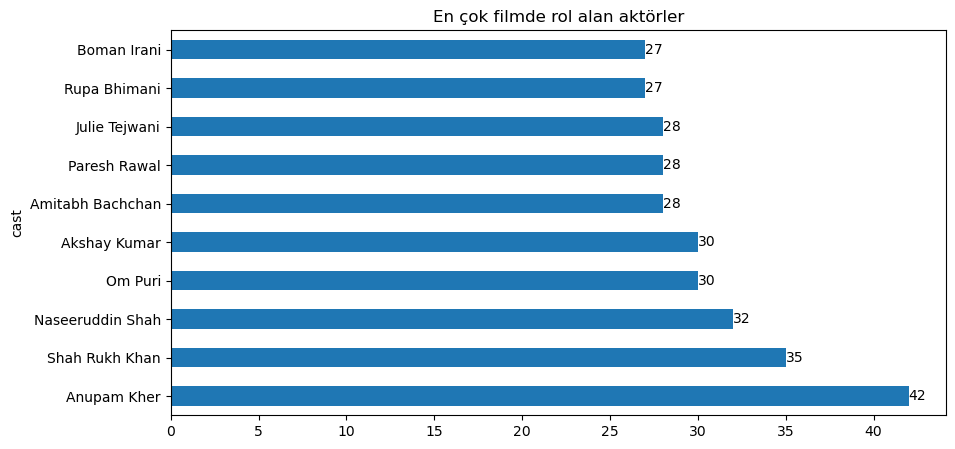

In [71]:
plt.figure(figsize=(10,5))
ax = df_cast_exploded['cast'].value_counts().nlargest(10).plot(kind='barh')
plt.title('En çok filmde rol alan aktörler');
for p in ax.containers:
    ax.bar_label(p);
# Yukarıda elde ettiğimiz veriyi görselleştirme yaptık.
# We visualized the data we obtained above.

In [72]:
from wordcloud import WordCloud
# WordCloud kütüphanesi, metin verisindeki kelimelerin sıklığına göre görselleştirme (kelime bulutu) oluşturmak için kullanılır.
# The WordCloud library is used to create visualizations (word clouds) based on the frequency of words in text data.

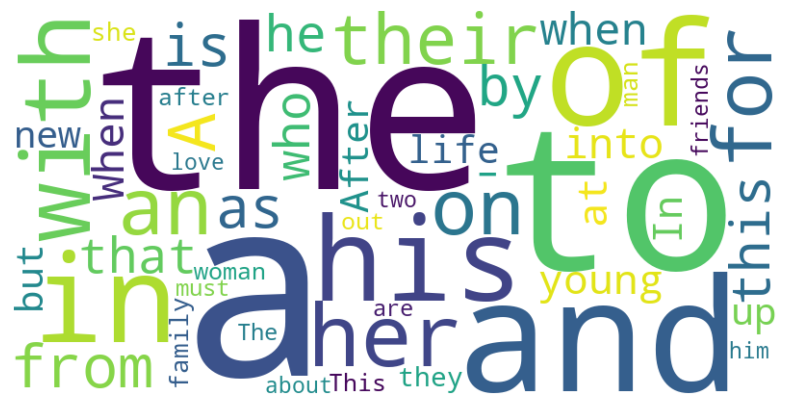

In [73]:

from collections import Counter

# description sütununu birleştirme
# Merge description column
text = ' '.join(df['description'].dropna())

# Metni kelimelere ayırma
# Breaking the text into words

words = text.split()

# Kelimelerin sıklığını sayma
# Metni kelimelere ayırma
word_counts = Counter(words)

# En çok kullanılan ilk 50 kelimeyi alma
# Getting the top 50 most used words
most_common_50 = dict(word_counts.most_common(50))

# En çok kullanılan 10 kelimeyi içeren kelime bulutu oluşturma
# Create a word cloud with the 10 most used words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(most_common_50)

# Kelime bulutunu görselleştirme
# Visualizing the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Eksenleri kapat (Close axes)
plt.show()